# WiDS - Temp Feature Engineering

In the WiDS dataset we have 36 temperature columns, 3 (min, avg, max) for each month. In this notebook we will try to see the effectiveness of all the columns in predicting our target variable. We will also see whether is it safe to drop redundant columns to prevent multicollinearity.

## Steps performed:

1. Slice the dataset to read just the temperature columns
2. Plotting the correlation matrix to see the effectiveness
3. We also fetch the spearman correlation values
4. Plotting various seaborn charts:
    - Barplot to check the count of each feature with respect to target variable
    - Scatterplot to detect outliers 
    - Regplot to visualize linear regression model for the target and each feature
5. Cleaning Data according to analysis
5. Binning Data to categorize different months into 4 seasons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

### **Considering features from 9 throgh 40**

In [3]:
sliced_df = train_df.iloc[:,8:44]
sliced_df['site_eui'] = train_df['site_eui']

In [4]:
sliced_df.head(5)

january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                36              50.5                68                 35   
1                36              50.5                68                 35   
2                36              50.5                68                 35   
3                36              50.5                68                 35   
4                36              50.5                68                 35   
5                36              50.5                68                 35   
6                36              50.5                68                 35   
7                36              50.5                68                 35   
8                36              50.5                68                 35   
9                36              50.5                68                 35   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          50.589286                 73              40       53.693548   
1          50.589286                 73              40       53.693548   
2          50.589286                 73              40       53.693548   
3          50.589286                 73              40       53.693548   
4          50.589286                 73              40       53.693548   
5          50.589286                 73              40       53.693548   
6          50.589286                 73              40       53.693548   
7          50.589286                 73              40       53.693548   
8          50.589286                 73              40       53.693548   
9          50.589286                 73              40       53.693548   

   march_max_temp  april_min_temp  ...  october_min_temp  october_avg_temp  \
0              80              41  ...                47         63.016129   
1              80              41  ...                47         63.016129   
2              80              41  ...                47         63.016129   
3              80              41  ...                47         63.016129   
4              80              41  ...                47         63.016129   
5              80              41  ...                47         63.016129   
6              80              41  ...                47         63.016129   
7              80              41  ...                47         63.016129   
8              80              41  ...                47         63.016129   
9              80              41  ...                47         63.016129   

   october_max_temp  november_min_temp  november_avg_temp  november_max_temp  \
0                83                 43               53.8                 72   
1                83                 43               53.8                 72   
2                83                 43               53.8                 72   
3                83                 43               53.8                 72   
4                83                 43               53.8                 72   
5                83                 43               53.8                 72   
6                83                 43               53.8                 72   
7                83                 43               53.8                 72   
8                83                 43               53.8                 72   
9                83                 43               53.8                 72   

   december_min_temp  december_avg_temp  december_max_temp    site_eui  
0                 36          49.274194                 71  248.682615  
1                 36          49.274194                 71   26.500150  
2                 36          49.274194                 71   24.693619  
3                 36          49.274194                 71   48.406926  
4                 36          49.274194                 71    3.899395  
5                 36          49.274194                 71    6.597715  
6                 36          49.274194                 71   12.817

In [5]:
for i in sliced_df.columns:
    print(i,"   ", sliced_df[i].mean())

january_min_temp     11.432342885805932
january_avg_temp     34.31046822242821
january_max_temp     59.05495201763534
february_min_temp     11.72056707630978
february_avg_temp     35.526837476778034
february_max_temp     58.48627849571657
march_min_temp     21.606280607732618
march_avg_temp     44.469291669749026
march_max_temp     70.8978312235173
april_min_temp     32.03717148250327
april_avg_temp     53.78486312522969
april_max_temp     82.66193223068495
may_min_temp     44.70617896696015
may_avg_temp     63.74254662586361
may_max_temp     88.9878559077049
june_min_temp     51.13176340140185
june_avg_temp     71.06638372794873
june_max_temp     91.4002798421268
july_min_temp     60.571603944189974
july_avg_temp     76.59687864684975
july_max_temp     95.54394973401799
august_min_temp     58.51506791451615
august_avg_temp     75.34874850812244
august_max_temp     92.57258075161371
september_min_temp     50.79168921683805
september_avg_temp     69.59754538251988
september_max_temp    

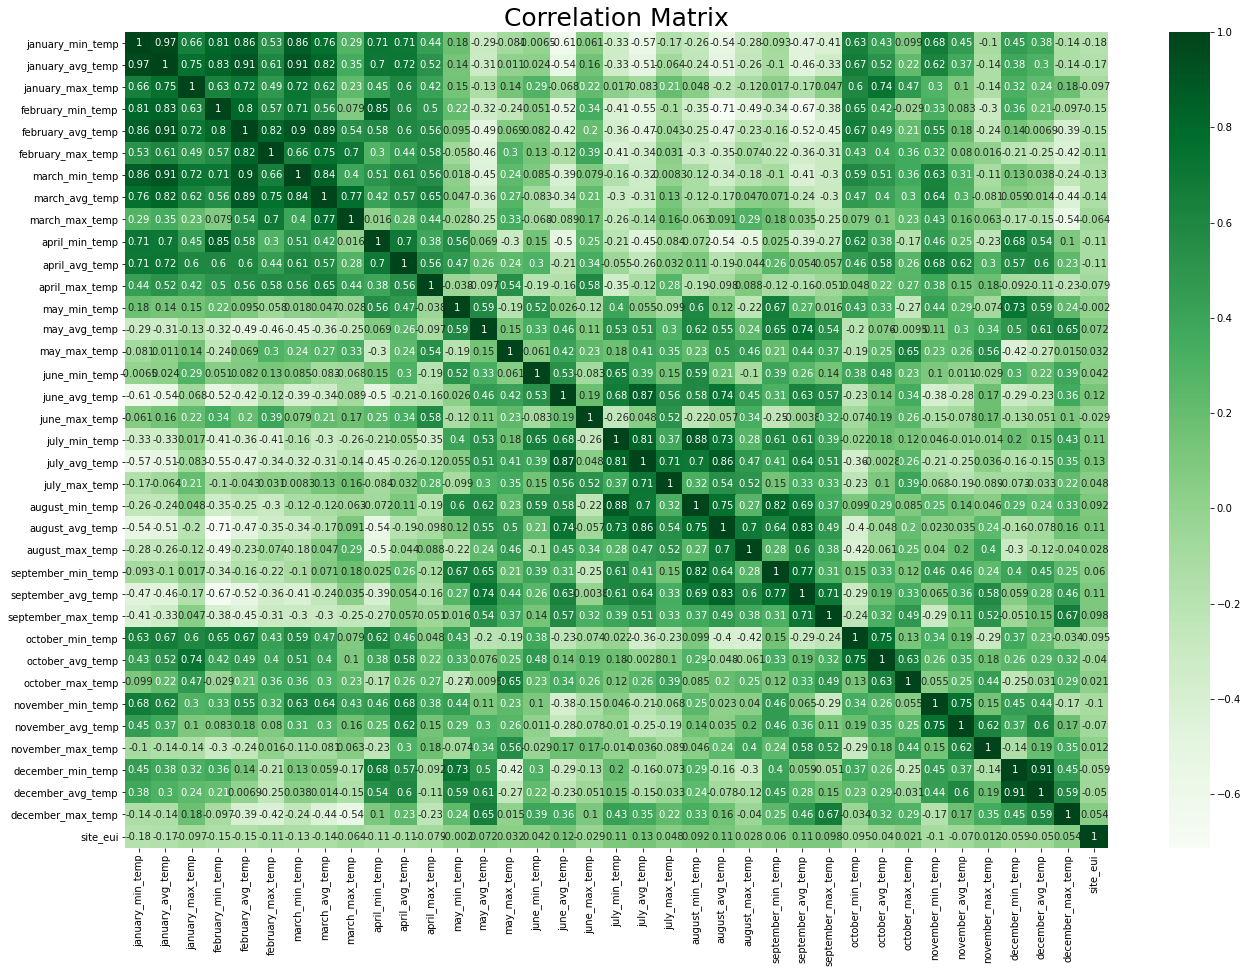

In [6]:
corr = sliced_df.corr()
# corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(22,15))
plt.title('Correlation Matrix', fontsize=25 )
sns.heatmap(corr, cmap="Greens",annot=True )
plt.show()

In [7]:
sliced_df.corr(method='spearman').loc[:,'site_eui']

january_min_temp     -0.236163
january_avg_temp     -0.227808
january_max_temp     -0.142992
february_min_temp    -0.212268
february_avg_temp    -0.242243
february_max_temp    -0.228528
march_min_temp       -0.216416
march_avg_temp       -0.215705
march_max_temp       -0.104934
april_min_temp       -0.166153
april_avg_temp       -0.131333
april_max_temp       -0.134449
may_min_temp          0.056205
may_avg_temp          0.153747
may_max_temp          0.022749
june_min_temp         0.121544
june_avg_temp         0.159279
june_max_temp        -0.040078
july_min_temp         0.223368
july_avg_temp         0.198166
july_max_temp         0.057484
august_min_temp       0.212739
august_avg_temp       0.165371
august_max_temp       0.048339
september_min_temp    0.143629
september_avg_temp    0.159299
september_max_temp    0.122555
october_min_temp     -0.116233
october_avg_temp      0.059089
october_max_temp      0.030060
november_min_temp    -0.113742
november_avg_temp    -0.056209
november

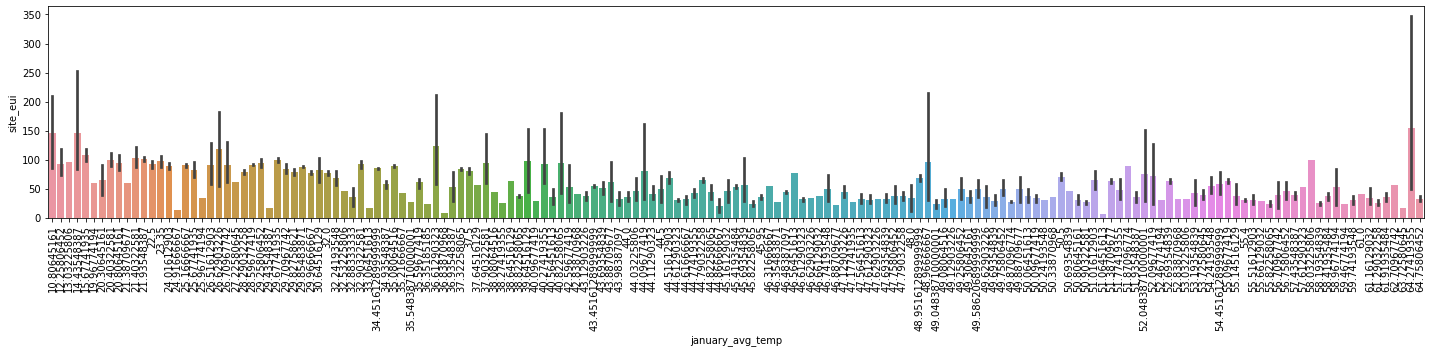

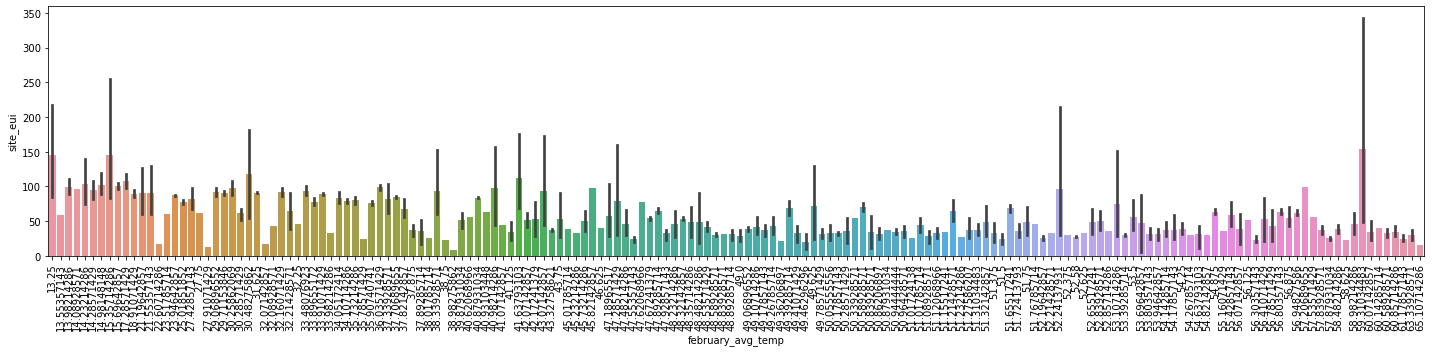

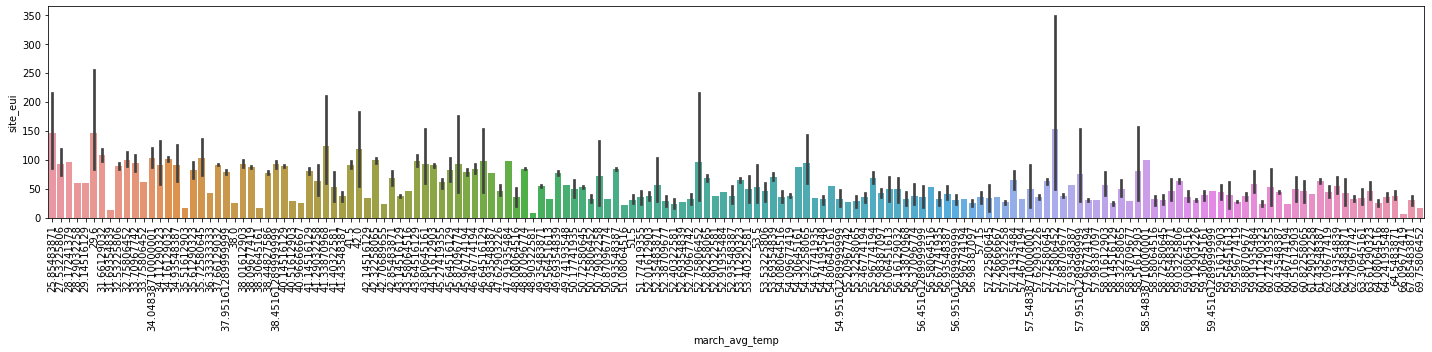

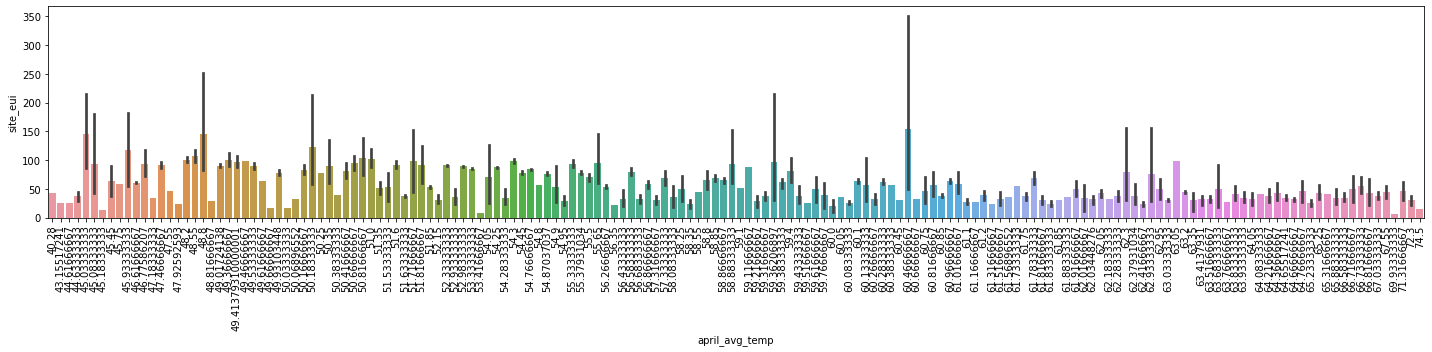

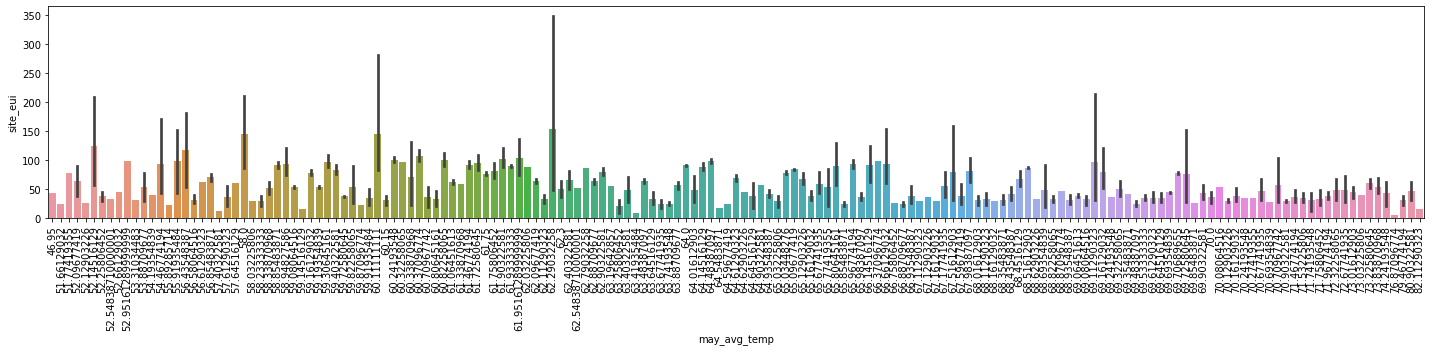

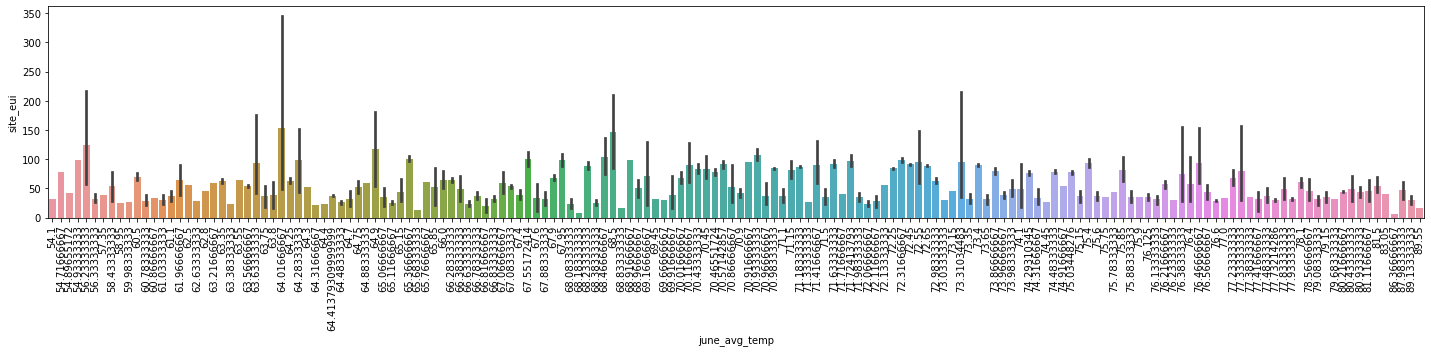

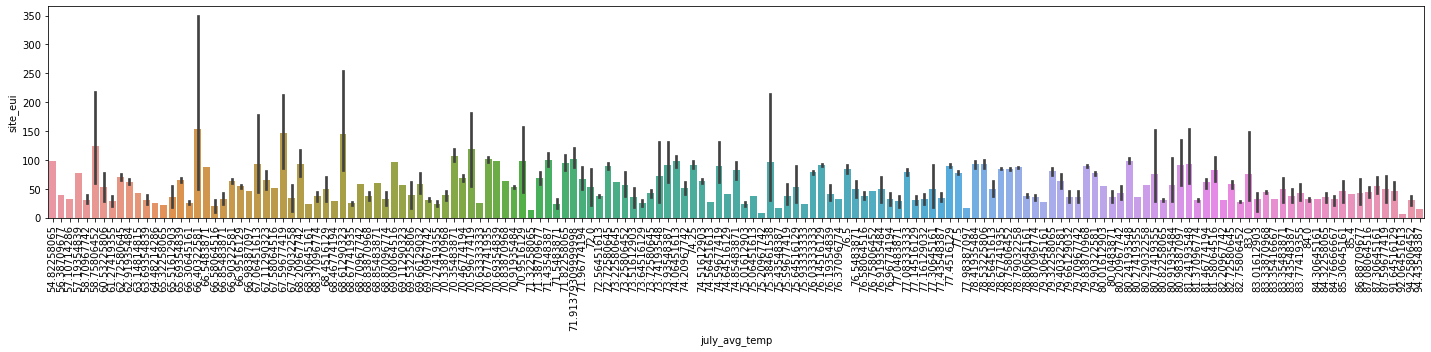

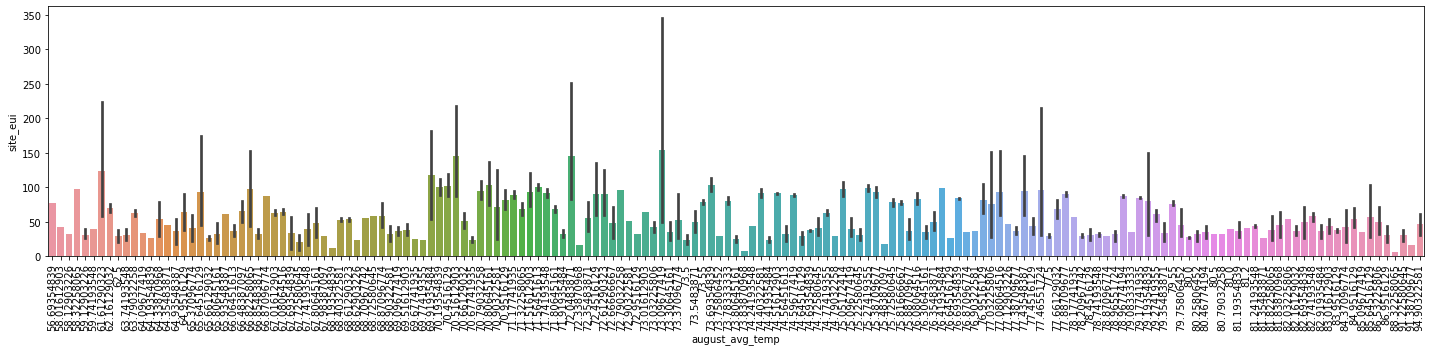

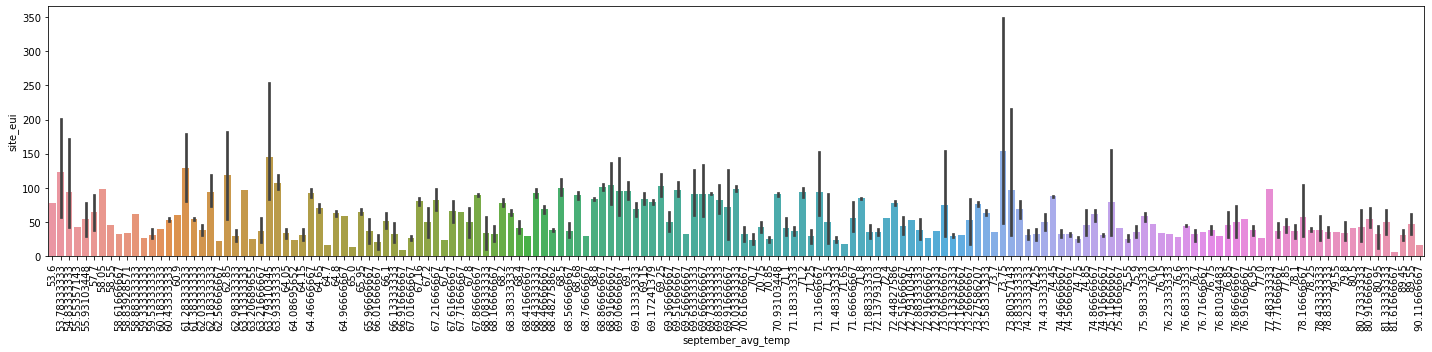

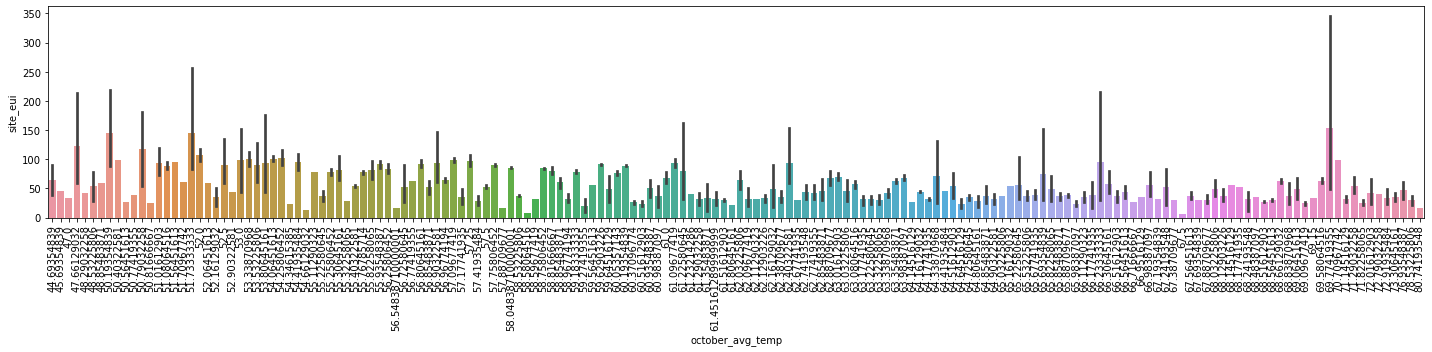

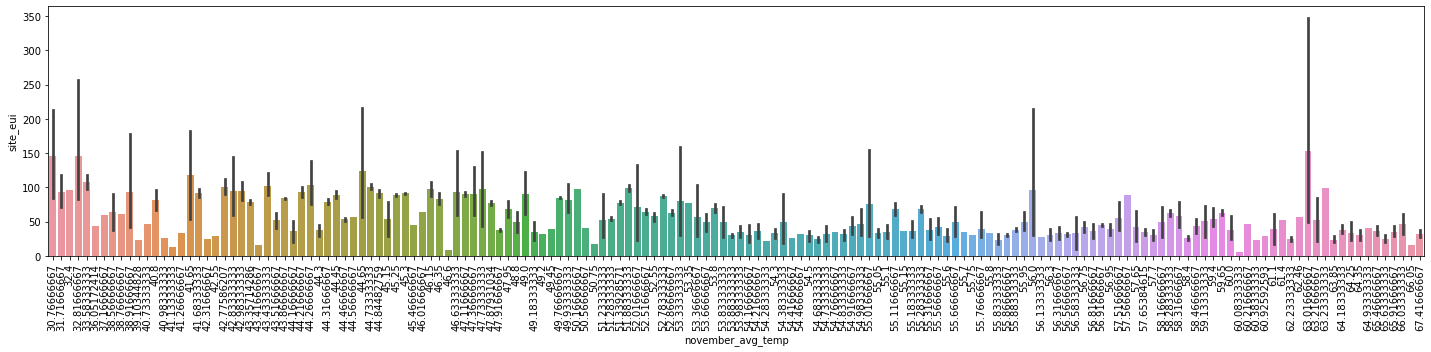

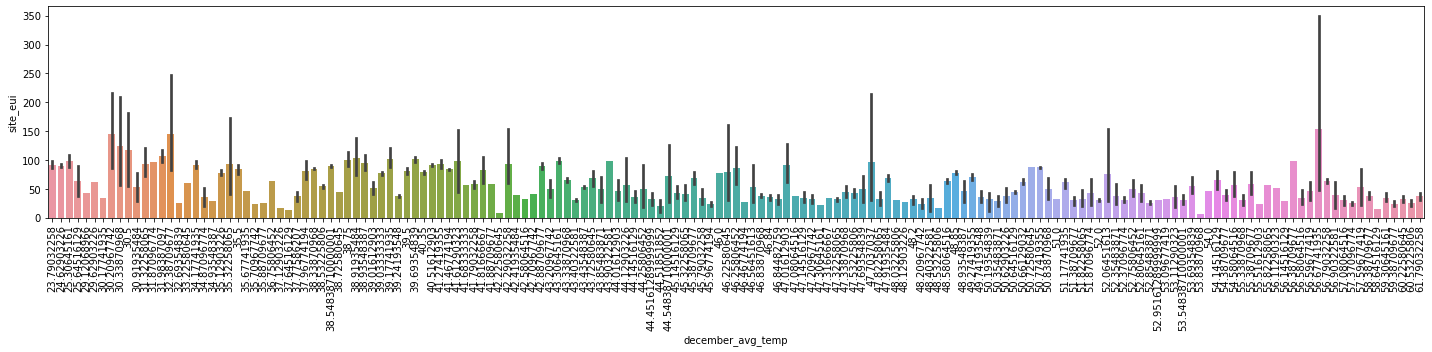

In [8]:
cols = ['january_avg_temp', 'february_avg_temp', 'march_avg_temp', 'april_avg_temp' ,'may_avg_temp', 
        'june_avg_temp', 'july_avg_temp', 'august_avg_temp','september_avg_temp', 'october_avg_temp', 'november_avg_temp', 'december_avg_temp']
for i in cols:
    plt.figure(figsize=(20,5))
    sns.barplot(x=i, y="site_eui", data=sliced_df.sort_values(by=i, ascending=False))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### **Scatter Plot for temp vs target** 

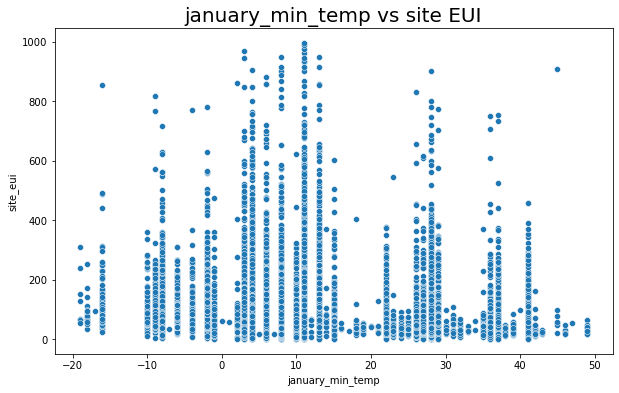

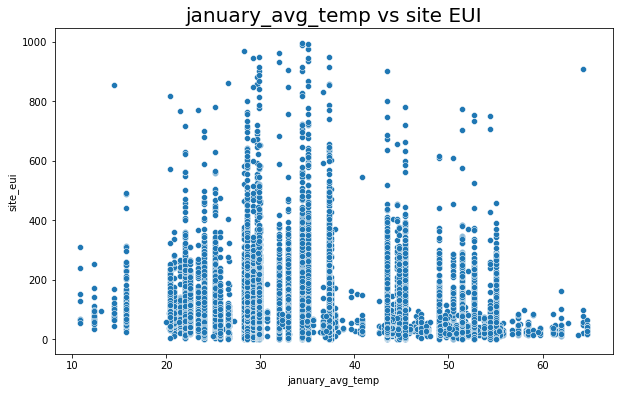

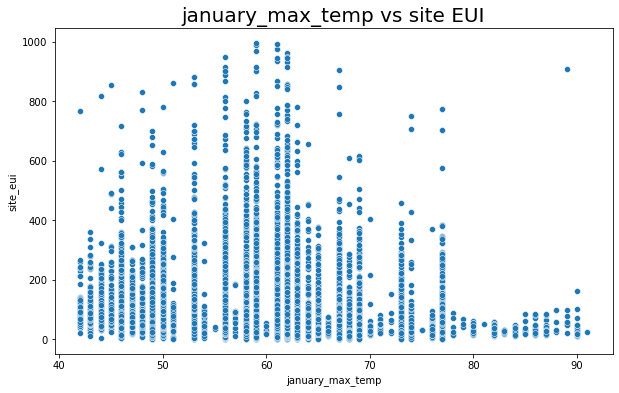

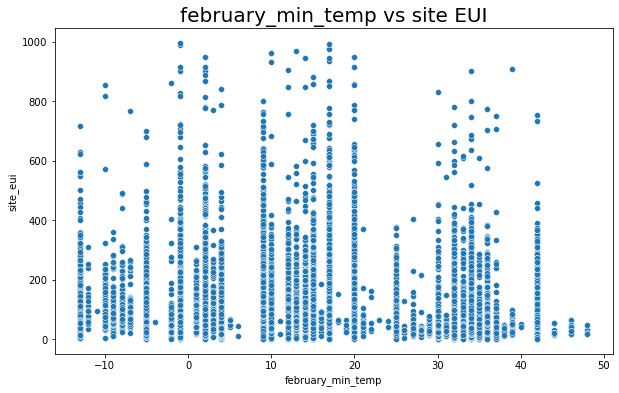

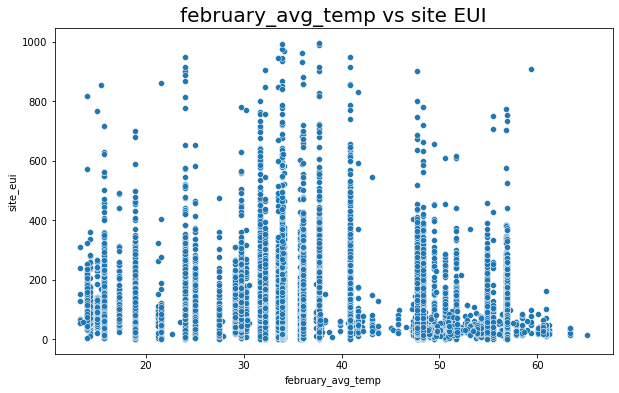

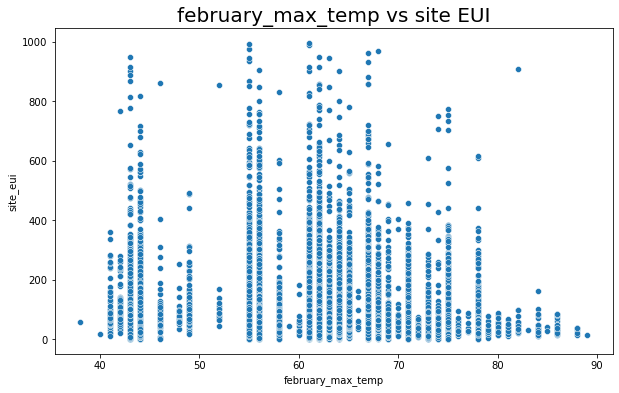

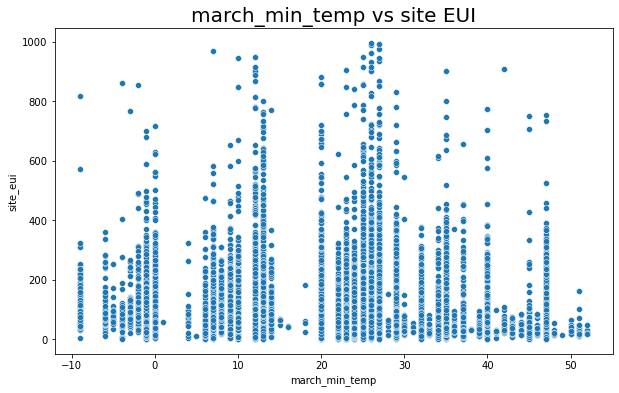

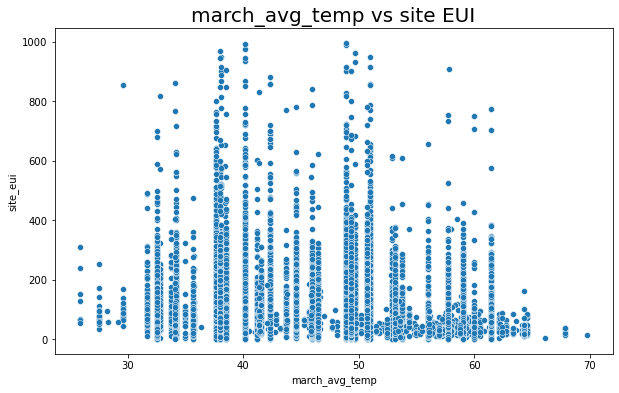

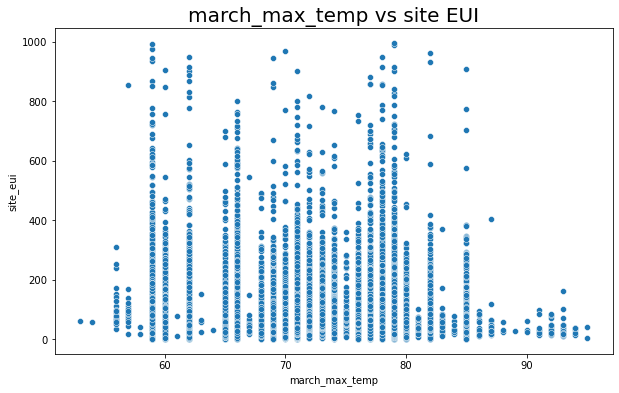

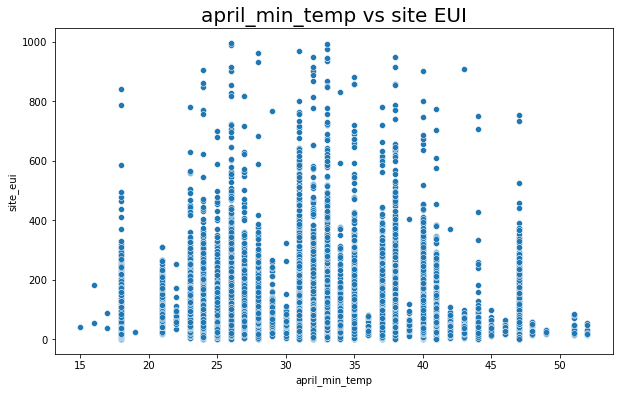

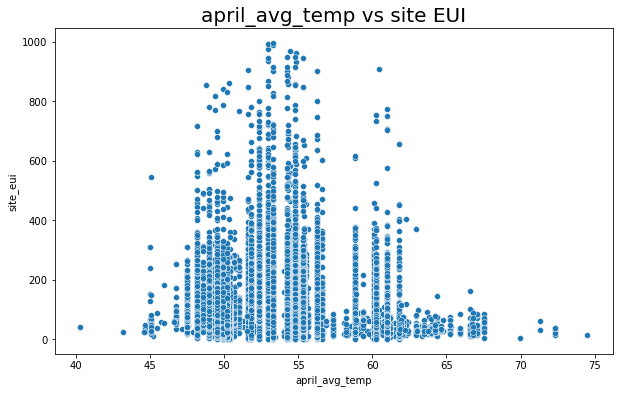

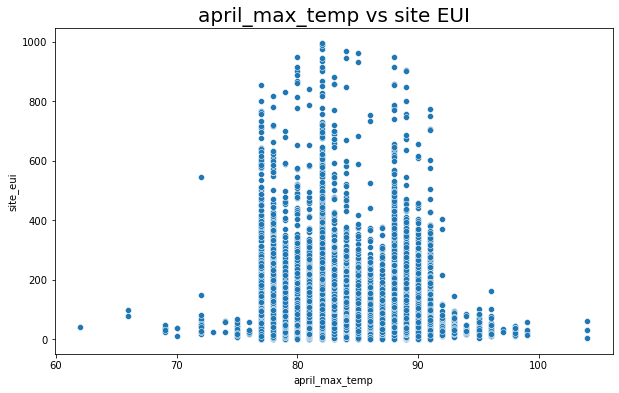

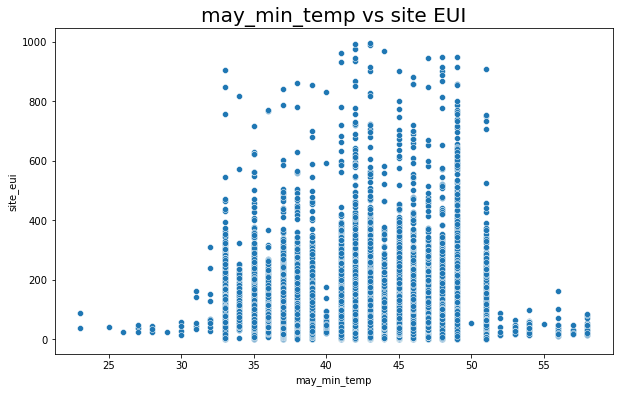

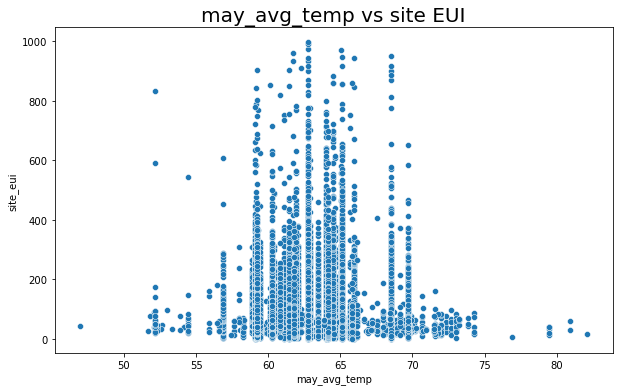

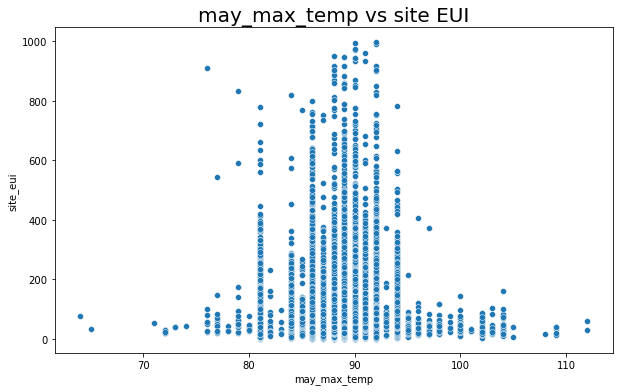

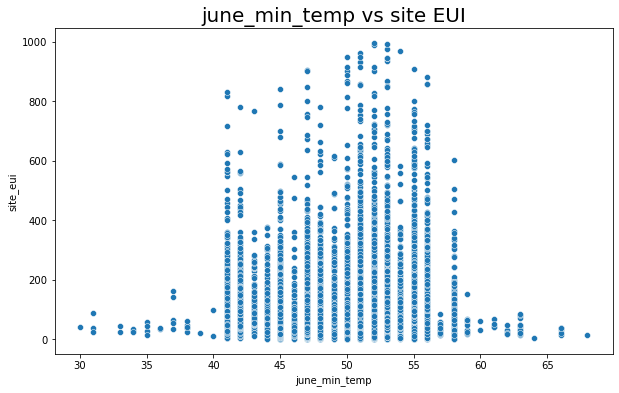

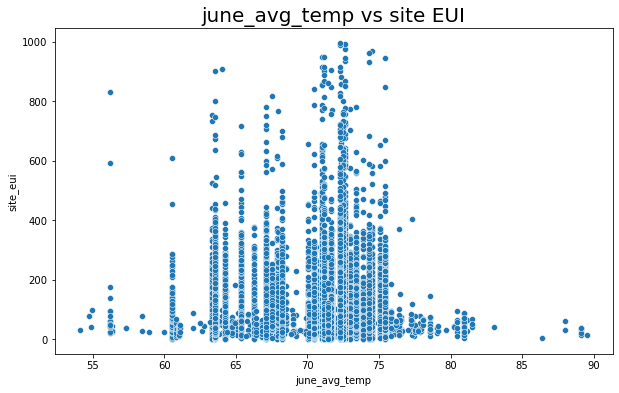

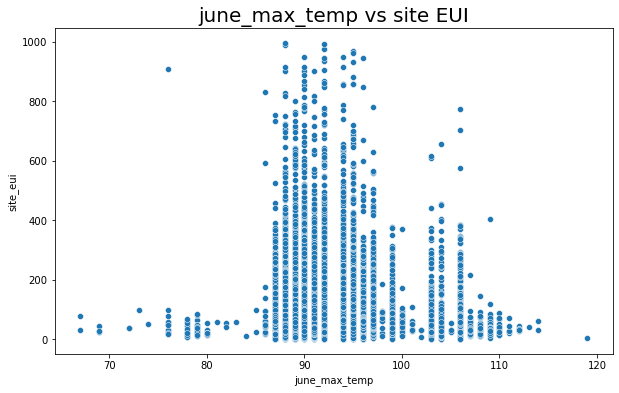

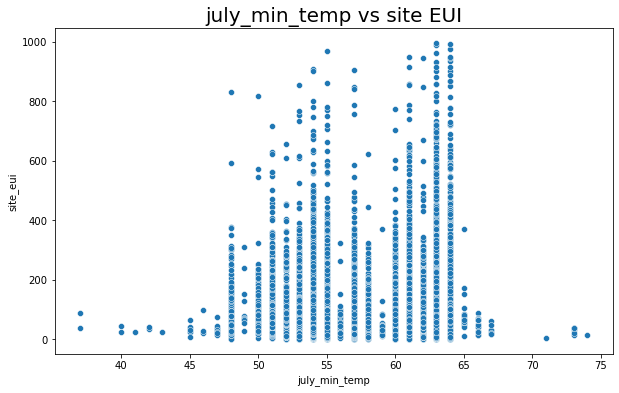

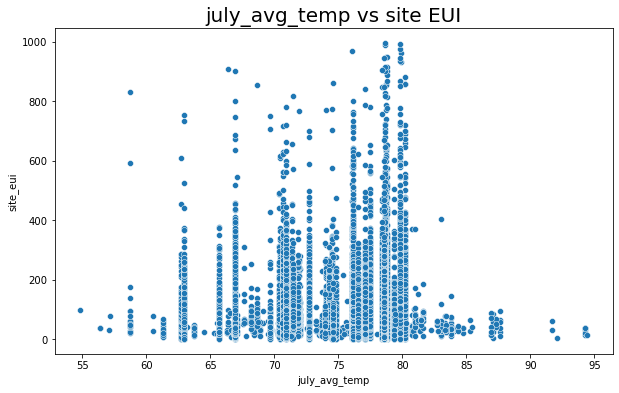

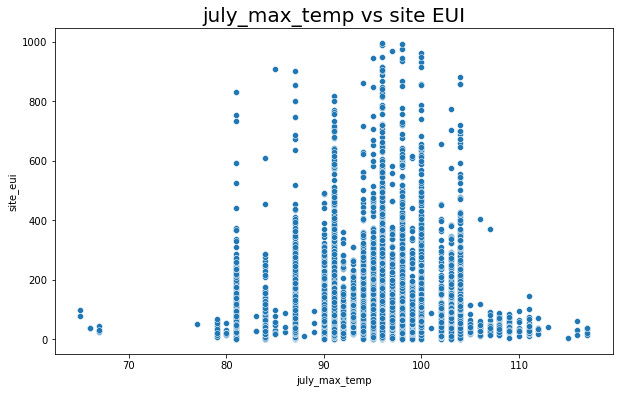

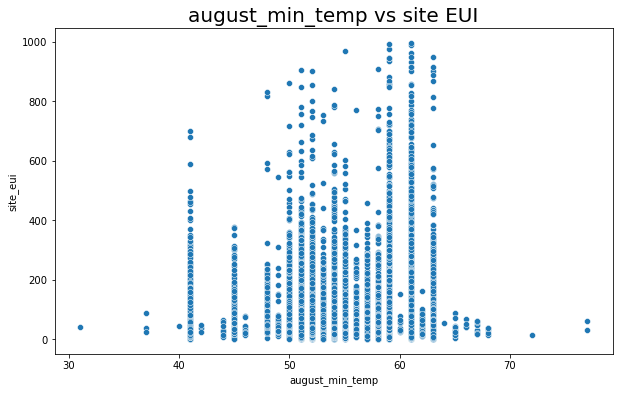

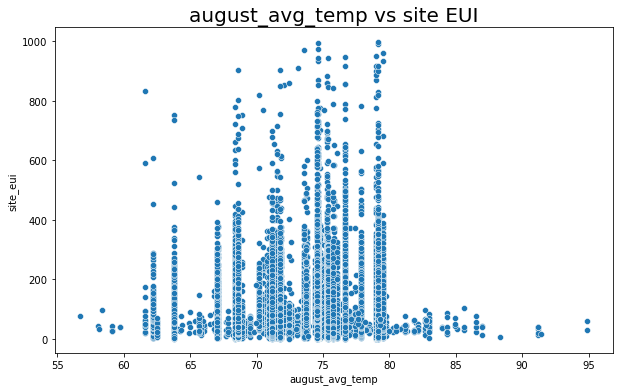

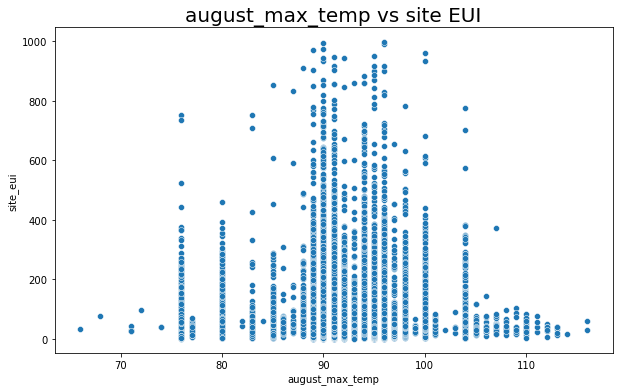

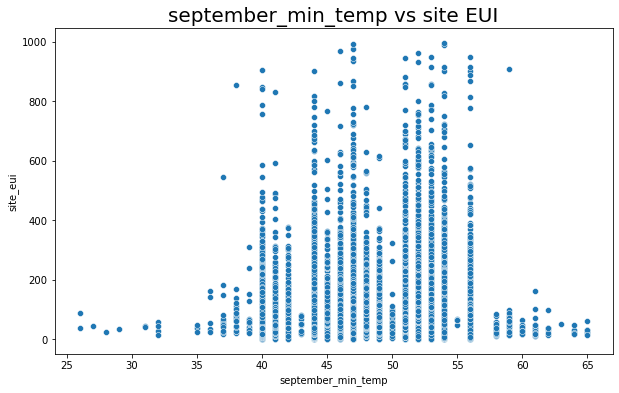

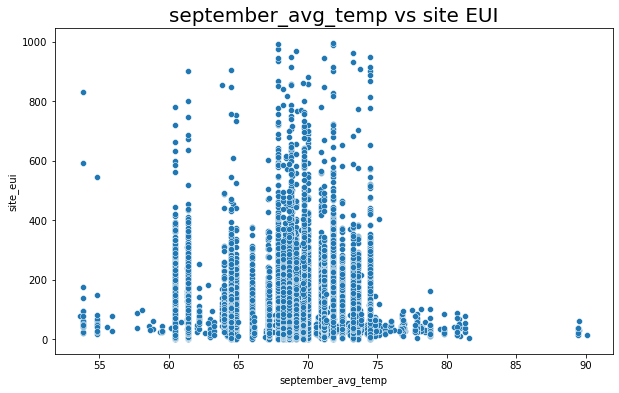

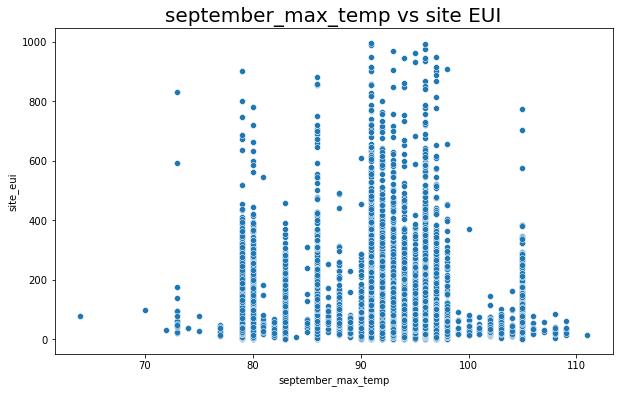

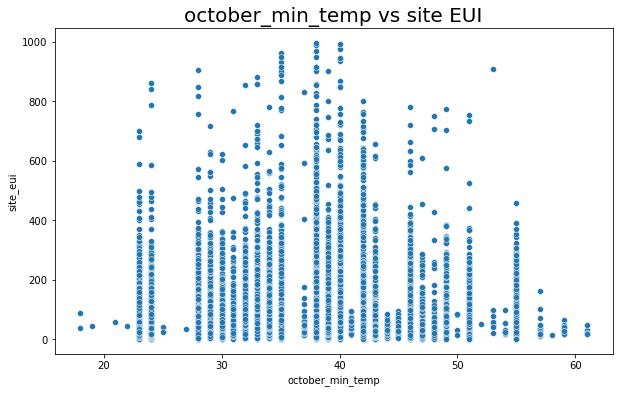

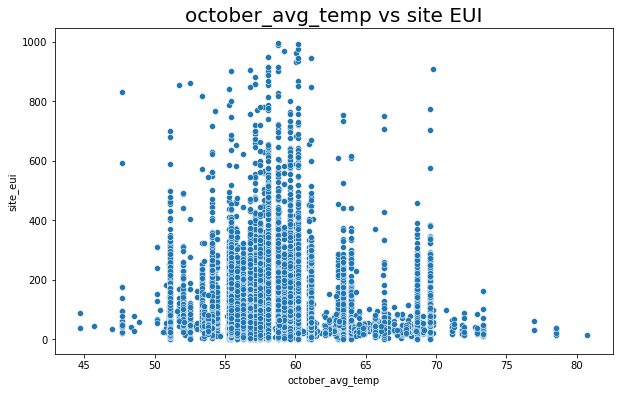

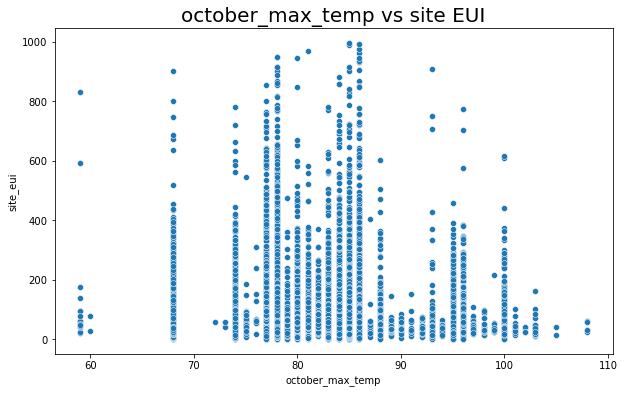

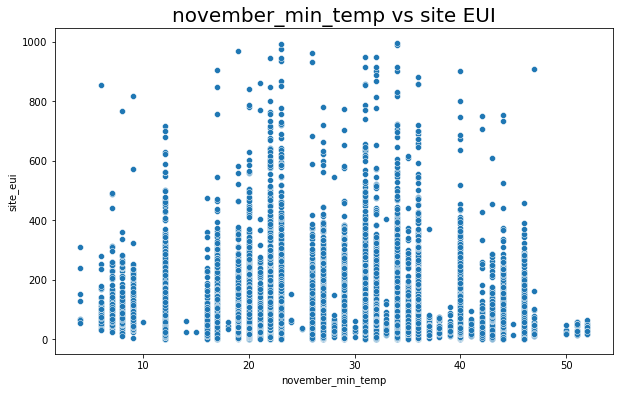

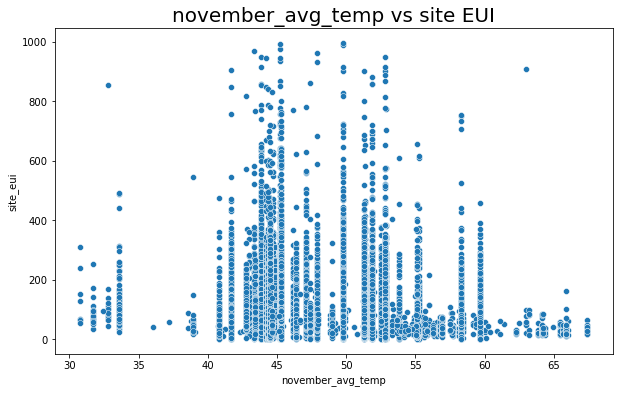

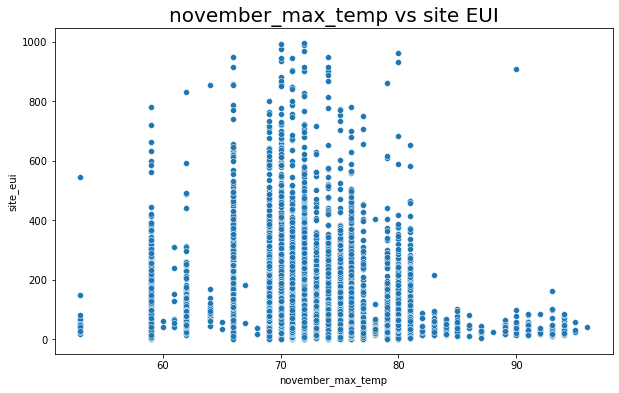

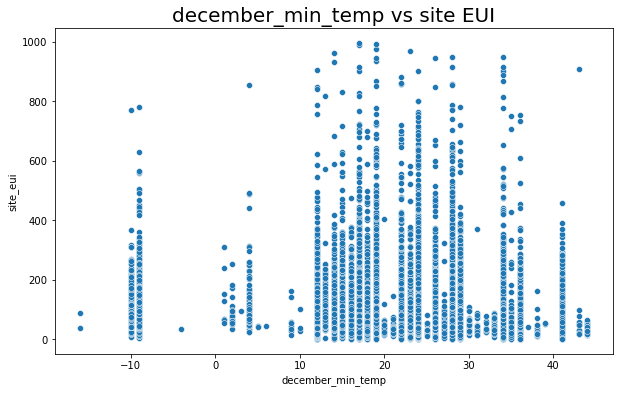

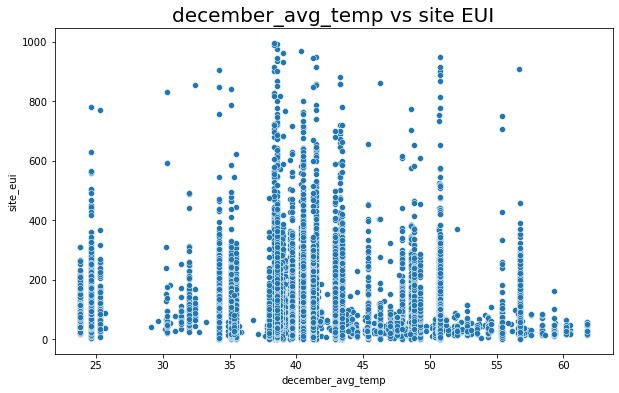

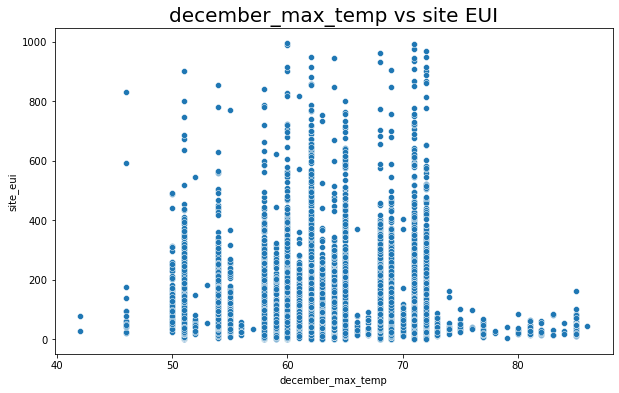

In [9]:
for i in sliced_df.iloc[:,:36]:
    fig = plt.figure(figsize=(10,6))
    sns.scatterplot(data=sliced_df, x=i, y="site_eui")
    plt.title(str(i)+' vs site EUI', fontsize=20)

### **Line Plot Overlaid on Scatter Plot for Average Temp**

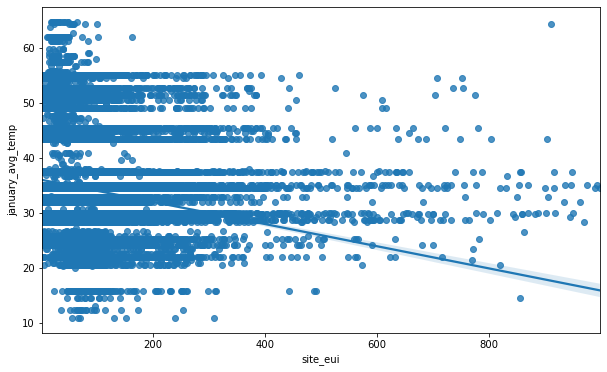

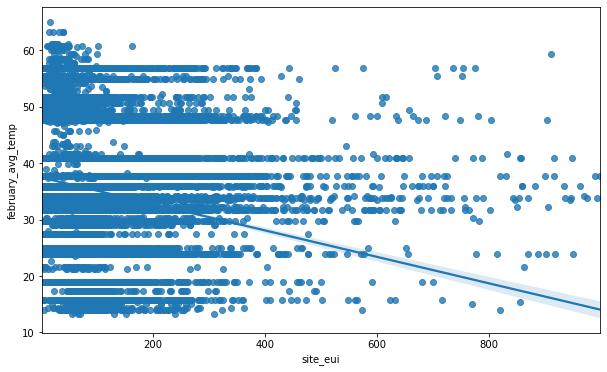

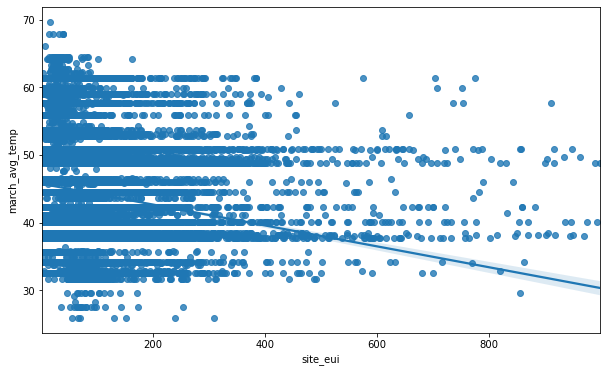

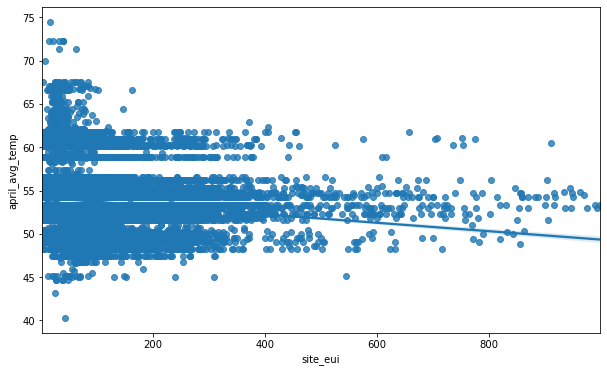

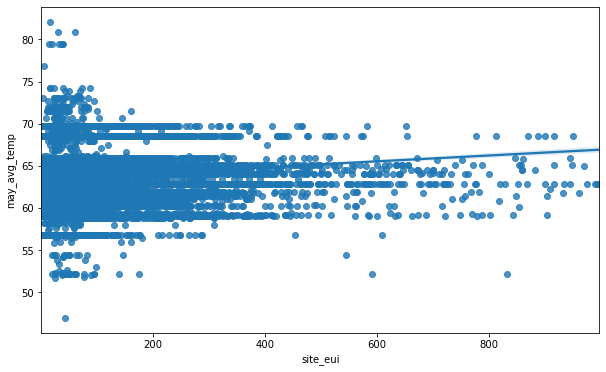

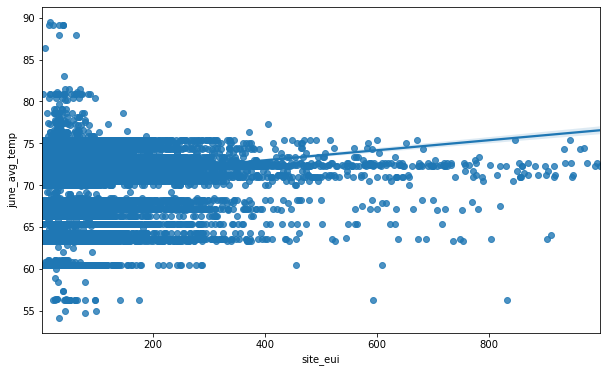

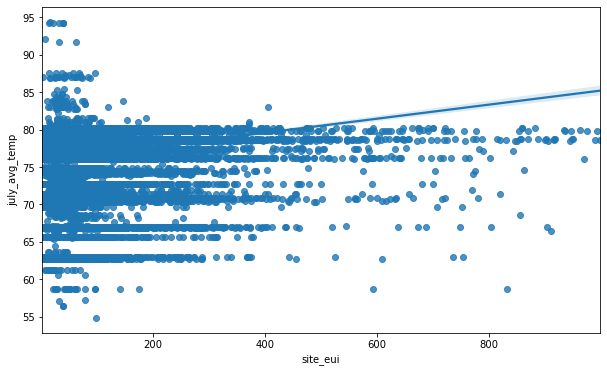

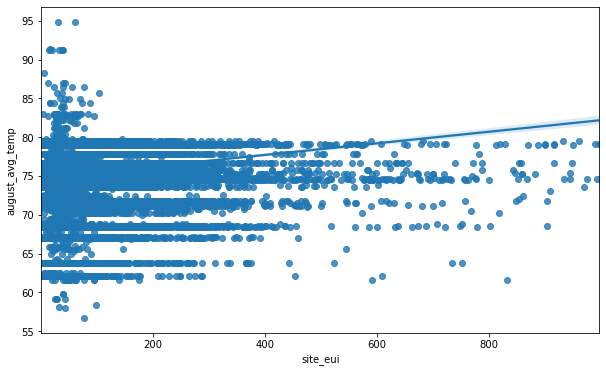

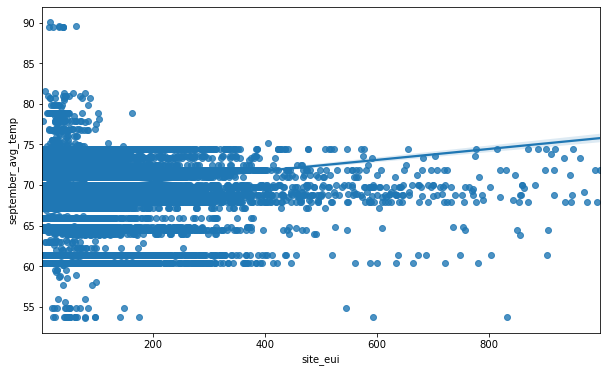

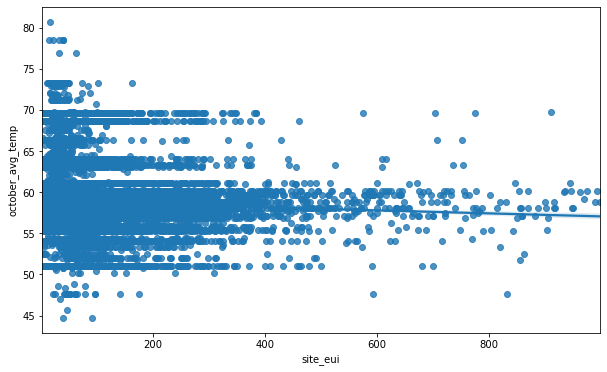

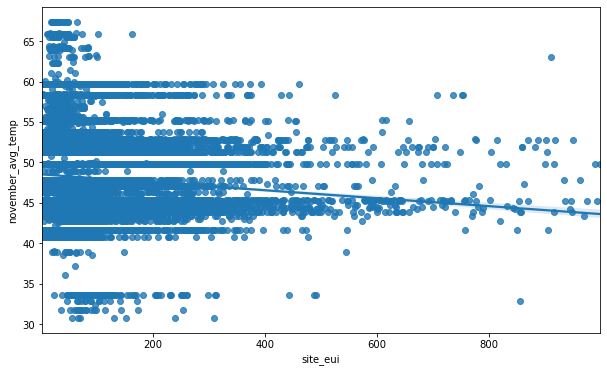

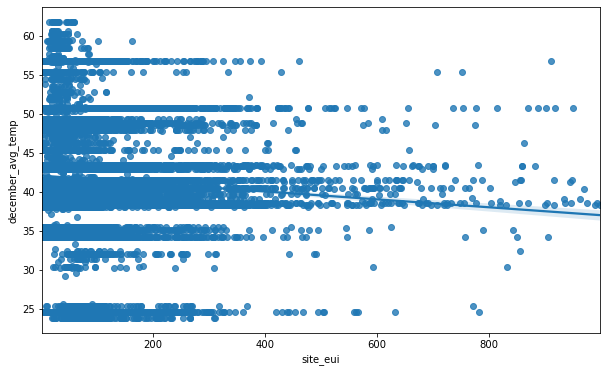

In [10]:
cols = ['january_avg_temp', 'february_avg_temp', 'march_avg_temp', 'april_avg_temp' ,'may_avg_temp', 
        'june_avg_temp', 'july_avg_temp', 'august_avg_temp','september_avg_temp', 'october_avg_temp', 'november_avg_temp', 'december_avg_temp']
for i in cols:   
    plt.figure(figsize=(10,6))
    sns.regplot(x = "site_eui", 
                y = i, 
                data = sliced_df)
    plt.show()

### We conclude that the temperature attributes do not have much effect on the site_eui. For the initial analysis dropping the min and max temp attributes and going forward with just the avg temp attribute.

In [11]:
sliced_df.head()

january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                36              50.5                68                 35   
1                36              50.5                68                 35   
2                36              50.5                68                 35   
3                36              50.5                68                 35   
4                36              50.5                68                 35   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          50.589286                 73              40       53.693548   
1          50.589286                 73              40       53.693548   
2          50.589286                 73              40       53.693548   
3          50.589286                 73              40       53.693548   
4          50.589286                 73              40       53.693548   

   march_max_temp  april_min_temp  ...  october_min_temp  october_avg_temp  \
0              80              41  ...                47         63.016129   
1              80              41  ...                47         63.016129   
2              80              41  ...                47         63.016129   
3              80              41  ...                47         63.016129   
4              80              41  ...                47         63.016129   

   october_max_temp  november_min_temp  november_avg_temp  november_max_temp  \
0                83                 43               53.8                 72   
1                83                 43               53.8                 72   
2                83                 43               53.8                 72   
3                83                 43               53.8                 72   
4                83                 43               53.8                 72   

   december_min_temp  december_avg_temp  december_max_temp    site_eui  
0                 36          49.274194                 71  248.682615  
1                 36          49.274194                 71   26.500150  
2                 36          49.274194                 71   24.693619  
3                 36          49.274194                 71   48.406926  
4                 36          49.274194                 71    3.899395  

[5 rows x 37 columns]

In [12]:
avg_temp_df = sliced_df[cols]
avg_temp_df.head()

january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
0              50.5          50.589286       53.693548            55.5   
1              50.5          50.589286       53.693548            55.5   
2              50.5          50.589286       53.693548            55.5   
3              50.5          50.589286       53.693548            55.5   
4              50.5          50.589286       53.693548            55.5   

   may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
0     56.854839           60.5      62.725806         62.16129   
1     56.854839           60.5      62.725806         62.16129   
2     56.854839           60.5      62.725806         62.16129   
3     56.854839           60.5      62.725806         62.16129   
4     56.854839           60.5      62.725806         62.16129   

   september_avg_temp  october_avg_temp  november_avg_temp  december_avg_temp  
0               64.65         63.016129               53.8          49.274194  
1               64.65         63.016129               53.8          49.274194  
2               64.65         63.016129               53.8          49.274194  
3               64.65         63.016129               53.8          49.274194  
4               64.65         63.016129               53.8          49.274194

**We are going to categorize the temp attributes into 4 seasons based on:**
1. spring runs from March 1 to May 31
2. summer runs from June 1 to August 31
3. fall (autumn) runs from September 1 to November 30; and
4. winter runs from December 1 to February 28

We have taken the mean of 3 temp months at a time and combined them under one season based on the above logic.

In [13]:
avg_temp_df['spring'] = (avg_temp_df['march_avg_temp'] + avg_temp_df['april_avg_temp'] + avg_temp_df['may_avg_temp'])/3
avg_temp_df['summer'] = (avg_temp_df['june_avg_temp'] + avg_temp_df['july_avg_temp'] + avg_temp_df['august_avg_temp'])/3
avg_temp_df['fall'] = (avg_temp_df['september_avg_temp'] + avg_temp_df['october_avg_temp'] + avg_temp_df['november_avg_temp'])/3
avg_temp_df['winter'] = (avg_temp_df['december_avg_temp'] + avg_temp_df['january_avg_temp'] + avg_temp_df['february_avg_temp'])/3

In [14]:
avg_temp_df.tail(10)

january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
75747         43.451613          47.672414       49.354839       56.266667   
75748         43.451613          47.672414       49.354839       56.266667   
75749         43.451613          47.672414       49.354839       56.266667   
75750         43.451613          47.672414       49.354839       56.266667   
75751         43.451613          47.672414       49.354839       56.266667   
75752         43.451613          47.672414       49.354839       56.266667   
75753         43.451613          47.672414       49.354839       56.266667   
75754         36.612903          41.637931       41.338710       50.183333   
75755         36.612903          41.637931       41.338710       50.183333   
75756         36.935484          42.172414       41.403226       51.533333   

       may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
75747     59.193548      63.566667      66.951613        68.612903   
75748     59.193548      63.566667      66.951613        68.612903   
75749     59.193548      63.566667      66.951613        68.612903   
75750     59.193548      63.566667      66.951613        68.612903   
75751     59.193548      63.566667      66.951613        68.612903   
75752     59.193548      63.566667      66.951613        68.612903   
75753     59.193548      63.566667      66.951613        68.612903   
75754     52.145161      56.233333      58.758065        61.612903   
75755     52.145161      56.233333      58.758065        61.612903   
75756     53.887097      58.433333      60.532258        64.338710   

       september_avg_temp  october_avg_temp  november_avg_temp  \
75747           61.383333         55.403226          51.283333   
75748           61.383333         55.403226          51.283333   
75749           61.383333         55.403226          51.283333   
75750           61.383333         55.403226          51.283333   
75751           61.383333         55.403226          51.283333   
75752           61.383333         55.403226          51.283333   
75753           61.383333         55.403226          51.283333   
75754           53.783333         47.661290          44.650000   
75755           53.783333         47.661290          44.650000   
75756           55.931034         48.532258          45.150000   

       december_avg_temp     spring     summer       fall     winter  
75747          38.532258  54.938351  66.377061  56.023297  43.218762  
75748          38.532258  54.938351  66.377061  56.023297  43.218762  
75749          38.532258  54.938351  66.377061  56.023297  43.218762  
75750          38.532258  54.938351  66.377061  56.023297  43.218762  
75751          38.532258  54.938351  66.377061  56.023297  43.218762  
75752          38.532258  54.938351  66.377061  56.023297  43.218762  
75753          38.532258  54.938351  66.377061  56.023297  43.218762  
75754          30.338710  47.889068  58.868100  48.698208  36.196515  
75755          30.338710  47.889068  58.868100  48.698208  36.196515  
75756          30.919355  48.941219  61.101434  49.871098  36.675751

### Now, we can work with the seasons' attributes. Hence, dropping the rest of the columns.

In [15]:
avg_temp_df.drop(cols, axis=1, inplace=True)
avg_temp_df.head()

spring     summer      fall    winter
0  55.349462  61.795699  60.48871  50.12116
1  55.349462  61.795699  60.48871  50.12116
2  55.349462  61.795699  60.48871  50.12116
3  55.349462  61.795699  60.48871  50.12116
4  55.349462  61.795699  60.48871  50.12116

# Conclusion

After analysis and few operations on our temperature features we brought down 36 columns to just 4. We will use this to build our initial model and later we can add features to see whether our model performs better.